# Mobile Customer Churn

In this Portfolio task you will work with some (fake but realistic) data on Mobile Customer Churn.  Churn is where
a customer leaves the mobile provider.   The goal is to build a simple predictive model to predict churn from available features. 

The data was generated (by Hume Winzar at Macquarie) based on a real dataset provided by Optus.  The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved so you need to be cautious in interpreting the results of your analysis here).  

The data is provided in file `MobileCustomerChurn.csv` and column headings are defined in a file `MobileChurnDataDictionary.csv` (store these in the `files` folder in your project).

Your high level goal in this notebook is to try to build and evaluate a __predictive model for churn__ - predict the value of the CHURN_IND field in the data from some of the other fields.  Note that the three `RECON` fields should not be used as they indicate whether the customer reconnected after having churned. 

__Note:__ you are not being evaluated on the _accuracy_ of the model but on the _process_ that you use to generate it.  You can use a simple model such as Logistic Regression for this task or try one of the more advanced methods covered in recent weeks.  Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inlisssne

In [5]:
churn = pd.read_csv("files/MobileCustomerChurn.csv", na_values=["NA", "#VALUE!"], index_col='INDEX')
churn.head()

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,...,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
INDEX,,,,,,,,,,,,,,,,,,,,,
1,1,46,1,30.0,CONSUMER,46,54.54,NON BYO,15,0,...,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,NaN,NaN,NaN
2,2,60,3,55.0,CONSUMER,59,54.54,NON BYO,5,0,...,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,NaN,NaN,NaN
3,5,65,1,29.0,CONSUMER,65,40.90,BYO,15,0,...,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,NaN,NaN,NaN
4,6,31,1,51.0,CONSUMER,31,31.81,NON BYO,31,0,...,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,NaN,NaN,NaN
5,8,95,1,31.0,CONSUMER,95,54.54,NON BYO,0,0,...,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,NaN,NaN,NaN


In [7]:
print('Missing value percnetage distribution by attribute:\n',churn.isna().sum()/len(churn)*100)

Missing value percnetage distribution by attribute:
 CUST_ID                          0.000000
ACCOUNT_TENURE                   0.000000
ACCT_CNT_SERVICES                0.000000
AGE                              0.164481
CFU                              0.000000
SERVICE_TENURE                   0.000000
PLAN_ACCESS_FEE                  0.000000
BYO_PLAN_STATUS                  0.000000
PLAN_TENURE                      0.000000
MONTHS_OF_CONTRACT_REMAINING     0.000000
LAST_FX_CONTRACT_DURATION        0.000000
CONTRACT_STATUS                  0.000000
PREV_CONTRACT_DURATION           0.000000
HANDSET_USED_BRAND               0.000000
CHURN_IND                        0.000000
MONTHLY_SPEND                    0.000000
COUNTRY_METRO_REGION             0.002164
STATE                            0.002164
RECON_SMS_NEXT_MTH              38.501493
RECON_TELE_NEXT_MTH             38.501493
RECON_EMAIL_NEXT_MTH            38.501493
dtype: float64


In [12]:
X = churn.drop(columns=['CUST_ID','CHURN_IND','RECON_SMS_NEXT_MTH','RECON_TELE_NEXT_MTH','RECON_EMAIL_NEXT_MTH'],axis=1)
y = churn['CHURN_IND']

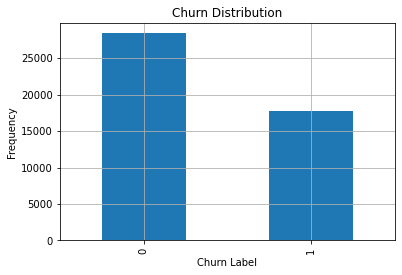

In [10]:
churn['CHURN_IND'].value_counts().plot.bar()
plt.title('Churn Distribution')
plt.xlabel('Churn Label')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Imputing missing values in attributes by most frequent strategy or the missing values are replaced by the value which is most
frequent in the column.

In [19]:
from sklearn.impute import SimpleImputer
col_names = X.columns.values.tolist()
mfreq = SimpleImputer(strategy='most_frequent')
Xtr = pd.DataFrame(mfreq.fit_transform(np.array(X)),columns=col_names).infer_objects()
Xtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46206 entries, 0 to 46205
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ACCOUNT_TENURE                46206 non-null  int64  
 1   ACCT_CNT_SERVICES             46206 non-null  int64  
 2   AGE                           46206 non-null  float64
 3   CFU                           46206 non-null  object 
 4   SERVICE_TENURE                46206 non-null  int64  
 5   PLAN_ACCESS_FEE               46206 non-null  float64
 6   BYO_PLAN_STATUS               46206 non-null  object 
 7   PLAN_TENURE                   46206 non-null  int64  
 8   MONTHS_OF_CONTRACT_REMAINING  46206 non-null  int64  
 9   LAST_FX_CONTRACT_DURATION     46206 non-null  int64  
 10  CONTRACT_STATUS               46206 non-null  object 
 11  PREV_CONTRACT_DURATION        46206 non-null  int64  
 12  HANDSET_USED_BRAND            46206 non-null  object 
 13  M

In [24]:
# Label encoding of categorical features
cat_cols = Xtr.select_dtypes(include='object').columns.values
for c in cat_cols:
    Xtr[c] = Xtr[c].astype('category')
    Xtr[c] = Xtr[c].cat.codes
Xtr.head()

,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
0,46,1,30.0,0,46,54.54,1,15,0,24,1,24,4,61.40,0,7
1,60,3,55.0,0,59,54.54,1,5,0,24,1,24,0,54.54,1,1
2,65,1,29.0,0,65,40.90,0,15,0,12,1,12,0,2.50,0,7
3,31,1,51.0,0,31,31.81,1,31,0,24,1,24,0,6.48,0,6
4,95,1,31.0,0,95,54.54,1,0,0,24,1,24,0,100.22,1,1


In [26]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
et = ExtraTreesClassifier(n_estimators=50,random_state=194)
et.fit(np.array(Xtr), y)
print('Importance scores of features by Tree based feature selection model Extra tree classifier:')
pd.DataFrame({'Feature name':Xtr.columns.values,'Importance Score':et.feature_importances_}\
            ).sort_values(by='Importance Score',ascending=False)

Importance scores of features by Tree based feature selection model Extra tree classifier:


,Feature name,Importance Score
13,MONTHLY_SPEND,0.177223
2,AGE,0.122536
0,ACCOUNT_TENURE,0.097287
4,SERVICE_TENURE,0.097217
8,MONTHS_OF_CONTRACT_REMAINING,0.091174
7,PLAN_TENURE,0.085896
15,STATE,0.069771
5,PLAN_ACCESS_FEE,0.064525
12,HANDSET_USED_BRAND,0.050954
1,ACCT_CNT_SERVICES,0.040977


Decision tree model parameters:
 {'ccp_alpha': 1e-05, 'class_weight': {0: 1, 1: 1.5}, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 200, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 199, 'splitter': 'best'}


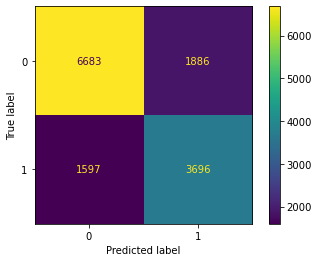

Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      8569
           1       0.66      0.70      0.68      5293

    accuracy                           0.75     13862
   macro avg       0.73      0.74      0.74     13862
weighted avg       0.75      0.75      0.75     13862



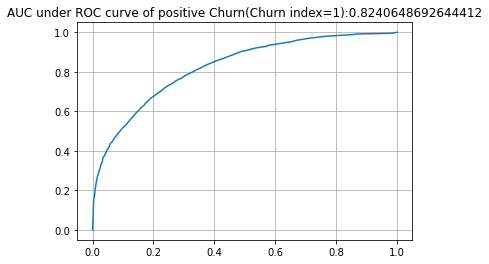

In [33]:
# Fitting Decision tree model and evaluating on test set by taking all features
# The splitting is done randomly in train and test in 70:30 ratio
Xtrarr = np.array(Xtr)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtrarr, y, test_size=0.3, random_state=67)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
treemodel = DecisionTreeClassifier(random_state=199,ccp_alpha=1e-5,criterion='entropy',class_weight={0:1,1:1.5},\
                                   max_leaf_nodes=200,min_samples_leaf=1,min_samples_split= 2,splitter='best')
treemodel.fit(X_train,y_train)
print('Decision tree model parameters:\n',treemodel.get_params())
ypreds = treemodel.predict(X_test)
probs = treemodel.predict_proba(X_test)
fig, axes = plt.subplots()
plot_confusion_matrix(treemodel,X_test, y_test,ax=axes)
plt.show()
print('Classification report: \n',classification_report(y_test,ypreds,\
                                                           labels = [0,1]))
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1], pos_label=1)
plt.plot(fpr,tpr)
plt.grid()
plt.title('AUC under ROC curve of positive Churn(Churn index=1):'+str(roc_auc_score(y_test,probs[:,1])))
plt.show()

Fitting decision tree model on the same train and test set with features with importance score over median of all features importance. The top features over median importance scores are selected from the fitted Extra tree classifier model.

Decision tree model parameters:
 {'ccp_alpha': 0.0001, 'class_weight': {0: 1, 1: 1.5}, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 200, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 199, 'splitter': 'best'}


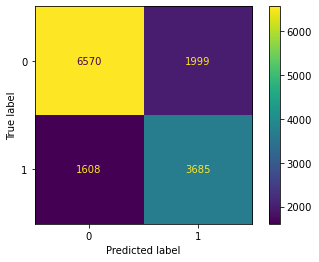

Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.78      8569
           1       0.65      0.70      0.67      5293

    accuracy                           0.74     13862
   macro avg       0.73      0.73      0.73     13862
weighted avg       0.74      0.74      0.74     13862



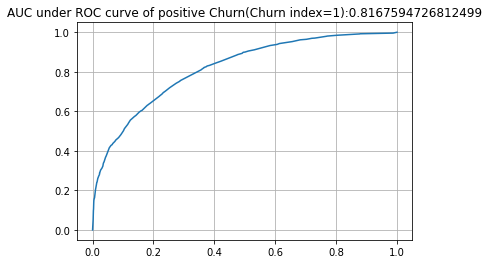

In [38]:
selector = SelectFromModel(et, prefit=True,threshold='median')
X_new = selector.transform(Xtrarr)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=67)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
treemodel = DecisionTreeClassifier(random_state=199,ccp_alpha=1e-4,criterion='entropy',class_weight={0:1,1:1.5},\
                                   max_leaf_nodes=200,min_samples_leaf=1,min_samples_split= 2,splitter='best')
treemodel.fit(X_train,y_train)
print('Decision tree model parameters:\n',treemodel.get_params())
ypreds = treemodel.predict(X_test)
probs = treemodel.predict_proba(X_test)
fig, axes = plt.subplots()
plot_confusion_matrix(treemodel,X_test, y_test,ax=axes)
plt.show()
print('Classification report: \n',classification_report(y_test,ypreds,\
                                                           labels = [0,1]))
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1], pos_label=1)
plt.plot(fpr,tpr)
plt.grid()
plt.title('AUC under ROC curve of positive Churn(Churn index=1):'+str(roc_auc_score(y_test,probs[:,1])))
plt.show()

It can be seen that from comparing with earlier results the performance of the decision tree model by selecting features over median threshold with Tree based feature selection method is slightly reduced than the performance on test set with all selected features in the decision tree model. The model parameters are also left identical and so as the random state of splitting into train and test, hence, the comparison is appropriate.